<a href="https://colab.research.google.com/github/JangAY/2206096_Moch-Nazham_PengolahanCitra/blob/main/2206096_Moch_Nazham_PCD_8_Pendeteksian_tepi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Soal No 1 Jenis Jenis Tepi**

1. **Jelaskan empat jenis tepi yang biasa ditemukan dalam citra digital**

* **Tepi Langkah (Step Edge)**  
    Perubahan intensitas piksel yang tiba-tiba dan signifikan dalam satu arah.  Ini adalah transisi paling ideal antara dua daerah dengan intensitas konstan yang berbeda.

* **Tepi Ramp (Ramp Edge)**
    Perubahan intensitas piksel yang lebih gradual dan merata.  Transisi antara dua daerah intensitas berbeda terjadi secara bertahap dalam sejumlah piksel.

* **Tepi Atap (Roof Edge)**
    Gabungan dari dua tepi langkah yang berlawanan arah, membentuk puncak atau lembah.  Ini terlihat seperti atap rumah dalam grafik intensitas.

* **Tepi Impuls (Line Edge)**
    Perubahan intensitas yang sangat tajam dan sempit, seperti sebuah garis tipis.  Ini bisa dianggap sebagai kasus khusus dari tepi langkah yang sangat kecil.


---
2. **Berikan contoh masing-masing jenis tepi dalam kehidupan sehari-hari.**

* **Tepi Langkah**
    Batas antara dinding putih dan lantai kayu gelap.  Perubahan intensitas warna sangat jelas dan tiba-tiba.

* **Tepi Ramp**
    Bayangan yang terbentuk di permukaan tanah pada siang hari. Intensitas cahaya secara bertahap menurun dari daerah terang menuju daerah gelap.  Atau, batas antara langit dan cakrawala saat matahari terbit/terbenam.

* **Tepi Atap**  
    Puncak gunung dilihat dari kejauhan.  Intensitas akan meningkat ketika kita mendekati puncak, lalu menurun kembali saat melewati puncak.

* **Tepi Impuls**
    Sebuah garis hitam tipis pada selembar kertas putih.  Perubahan intensitas terjadi hanya pada garis yang sangat sempit.


---
3. **Mengapa tepi dengan derau memerlukan pendekatan khusus untuk pendeteksiannya?**

    Tepi dengan derau memerlukan pendekatan khusus karena derau dapat menyebabkan perubahan intensitas yang acak pada citra, menghasilkan tepi palsu atau mengaburkan tepi asli. Derau sering kali menciptakan kesalahan positif, di mana tepi yang sebenarnya tidak ada terdeteksi, dan kesalahan negatif, di mana tepi asli gagal dikenali. Algoritma pendeteksian tepi sederhana, seperti Sobel atau Prewitt, sensitif terhadap fluktuasi ini, sehingga membutuhkan langkah prapemrosesan seperti penghalusan menggunakan filter Gaussian untuk meredam derau. Selain itu, algoritma seperti Canny Edge Detection dirancang untuk menangani derau dengan kombinasi penghalusan, analisis gradien, dan penghapusan tepi palsu melalui ambang batas ganda. Pendekatan ini memastikan deteksi tepi yang lebih akurat meskipun citra dipengaruhi oleh derau.


# **Soal 2: Pendeteksian Tepi Menggunakan Operator Gradien**

1. Saya memilih operator Sobel karena lebih sensitif terhadap perubahan gradien dibandingkan Prewitt, sehingga dapat memberikan hasil deteksi tepi yang lebih baik dalam banyak kasus.

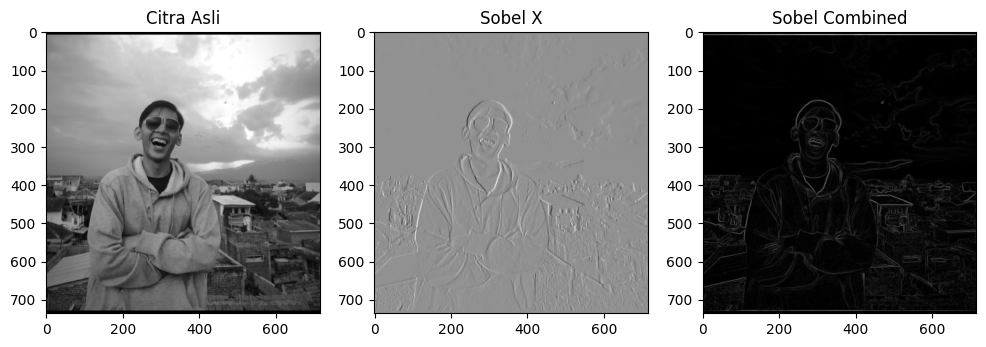

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca Citra
image = cv2.imread('/content/drive/MyDrive/Foto/IMG_20241013_151811.jpg', cv2.IMREAD_GRAYSCALE)  # Membaca citra dalam skala abu-abu

# 2. Menerapkan Operator Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Deteksi tepi horizontal
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Deteksi tepi vertikal

# 3. Menggabungkan Hasil
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Menghitung magnitudo gradien

# 4. Menampilkan Hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Citra Asli')
plt.subplot(1, 3, 2), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Combined')
plt.show()


 **3. Penjelasan Langkah-langkah Implementasi**
1. **Membaca Citra**  
   Citra diambil menggunakan fungsi `cv2.imread`, dengan opsi `cv2.IMREAD_GRAYSCALE` untuk memastikan citra dalam skala abu-abu karena pendeteksian tepi bekerja pada intensitas piksel.

2. **Mengaplikasikan Operator Sobel**  
   - Fungsi `cv2.Sobel` digunakan untuk menghitung gradien intensitas di arah horizontal (`dx=1, dy=0`) dan vertikal (`dx=0, dy=1`).
   - Parameter `cv2.CV_64F` memastikan hasil memiliki presisi tinggi (tipe data float64).

3. **Menggabungkan Gradien X dan Y**  
   - Magnitudo gradien dihitung menggunakan fungsi **cv2.magnitude**, yang menggabungkan hasil gradien horizontal dan vertikal

4. **Visualisasi Hasil**  
   Menggunakan pustaka **Matplotlib**, hasil dari Sobel X, Sobel Combined, dan citra asli ditampilkan secara berdampingan untuk analisis visual.

# **Soal 3: Perbandingan Operator Pendeteksi Tepi**

**1. Perbandingan Sobel, Pretwitt, dan Canny**

**Akurasi Pendeteksian**

1) Sobel
  - Akurasi lebih baik daripada Prewitt karena memperhitungkan koefisien pembobotan lebih kompleks.
  - Sensitif terhadap noise.

2) Prewitt
  - Akurasi lebih rendah dibanding Sobel.
  - Menggunakan pembobotan sederhana.

3) Canny
  - Akurasi tinggi karena mencakup penghalusan (reduksi noise), deteksi gradien, dan penghapusan tepi palsu.
  - Cocok untuk mendeteksi tepi yang halus atau kompleks.

**Kompleksitas Komputasi**

1) Sobel
  - Kompleksitas moderat (perhitungan gradien dengan filter 3x3).

2) Prewitt
  - Kompleksitas rendah karena pendekatan lebih sederhana.

3) Canny
  - Kompleksitas tinggi karena melibatkan prapemrosesan noise, penghitungan gradien, non-maximum suppression, dan thresholding adaptif.

---

**2. Situasi di Mana Operator Canny Lebih Direkomendasikan**

1) Kebutuhan Akurasi Tinggi

Canny menghasilkan deteksi tepi yang presisi dengan menghilangkan tepi palsu menggunakan non-maximum suppression dan ambang batas ganda (hysteresis thresholding). Hal ini ideal untuk citra dengan tepi halus atau detail kompleks.

2) Citra dengan Derau Tinggi

Canny mencakup langkah prapemrosesan dengan Gaussian smoothing, sehingga lebih tahan terhadap noise dibandingkan Sobel atau Prewitt.

3) Citra dengan Tepi yang Kompleks

Dalam kasus seperti citra medis (MRI, X-ray) atau pengolahan gambar satelit, di mana tepi memiliki detail yang kompleks, Canny lebih unggul karena mempertahankan struktur yang halus dan signifikan.

4) Aplikasi yang Membutuhkan Konsistensi

Untuk aplikasi seperti deteksi objek, pengenalan pola, atau visi komputer, di mana konsistensi dalam pendeteksian sangat penting, Canny lebih cocok.

# **Soal 4: Pendeteksian Tepi pada Citra Noisy**

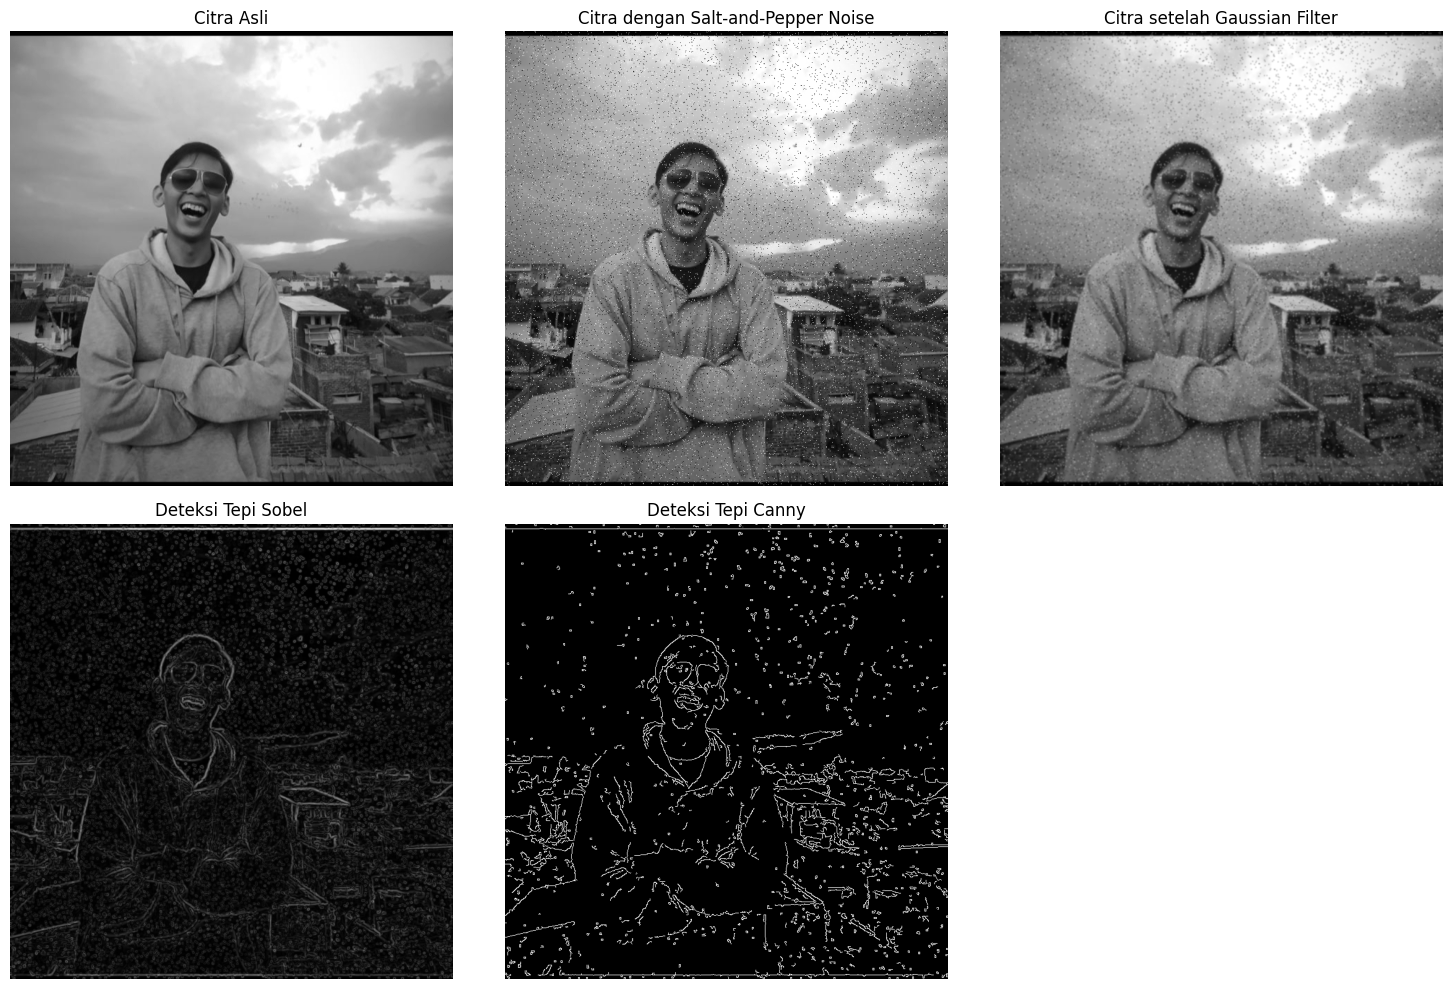

In [8]:
# Mengimpor kembali pustaka yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menambahkan noise salt-and-pepper
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    total_pixels = image.size

    # Menentukan jumlah piksel untuk "salt" dan "pepper"
    num_salt = int(salt_prob * total_pixels)
    num_pepper = int(pepper_prob * total_pixels)

    # Menambahkan noise "salt"
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Menambahkan noise "pepper"
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

# Memuat ulang citra asli
image_path = '/content/drive/MyDrive/Foto/IMG_20241013_151811.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Menambahkan noise salt-and-pepper
salt_pepper_image = add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)

# Menghaluskan citra menggunakan Gaussian filter
gaussian_filtered_image = cv2.GaussianBlur(salt_pepper_image, (5, 5), 1)

# Menerapkan Sobel pada citra yang telah difilter
sobel_x_filtered = cv2.Sobel(gaussian_filtered_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_filtered = cv2.Sobel(gaussian_filtered_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined_filtered = cv2.magnitude(sobel_x_filtered, sobel_y_filtered)

# Menerapkan Canny pada citra yang telah difilter
canny_filtered = cv2.Canny(gaussian_filtered_image, 100, 200)

# Menampilkan hasil
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title('Citra dengan Salt-and-Pepper Noise')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title('Citra setelah Gaussian Filter')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(sobel_combined_filtered, cmap='gray')
plt.title('Deteksi Tepi Sobel')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(canny_filtered, cmap='gray')
plt.title('Deteksi Tepi Canny')
plt.axis('off')

plt.tight_layout()
plt.show()



**Hasil Analisis**

**1. Citra dengan Derau Salt-and-Pepper**  
  
  Penambahan derau "salt-and-pepper" mengakibatkan banyak piksel acak pada citra menjadi putih (salt) atau hitam (pepper). Hal ini menciptakan gangguan visual dan dapat memengaruhi akurasi pendeteksian tepi.

**2. Citra setelah Gaussian Filter**
  
  Gaussian filter mampu mengurangi derau dengan cara menghaluskan citra. Derau "salt-and-pepper" sebagian besar dihapus, sehingga citra menjadi lebih seragam. Namun, Gaussian filter tidak sepenuhnya menghilangkan derau yang tajam karena lebih efektif pada derau Gaussian.

**3. Hasil Deteksi Tepi Sobel**

  * Pada citra hasil Gaussian filter, operator Sobel dapat mendeteksi tepi dengan cukup baik.
  * Sobel menghitung gradien pada arah horizontal dan vertikal. Namun, sensitivitas Sobel terhadap sisa derau yang tidak terfilter membuat beberapa tepi palsu tetap muncul.

**4. Hasil Deteksi Tepi Canny**

  * Operator Canny memberikan hasil deteksi tepi yang lebih tajam dan akurat dibandingkan Sobel. Proses non-maximum suppression dan ambang batas ganda (hysteresis thresholding) pada metode ini membantu mengurangi tepi palsu dan mempertahankan tepi yang signifikan.
  * Canny juga lebih efektif dalam menghadapi sisa derau, sehingga menghasilkan deteksi tepi yang lebih bersih.